# Hand Writing Recognition using LeNet

## Problem Statement

Build a LeNet model to automatically recognize hand-written digits in MNIST dataset



## Given

MNIST Dataset



## Goal

Recognize digits in the hand-writing recognition dataset


## Brainstorming

[Whiteboard](https://www.tutorialspoint.com/whiteboard.htm)

# Project Pipeline

## **Activity** 1: Pre-processing the dataset

### **Concepts for this activity** 

*Fundamentals*  
🔴 [MNIST Dataset](https://github.com/MrHeadbang/machineLearning/blob/main/mnist.zip)  
🔴 [Numpy reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)  
🔴 [Label binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html)

### **A**1.1 Import MNIST dataset


In [2]:
# Import MNIST dataset (Install tensorflow 2.11)

In [3]:
from tensorflow.keras.datasets import mnist

2024-01-11 14:29:19.134757: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-11 14:29:19.205708: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-11 14:29:19.207976: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib:/opt/ros/noetic/lib/x86_64-linux-gnu:/home/dfki.uni-bremen.de/csingh/.mujo

### **A**1.2 Load MNIST dataset


In [4]:
# Load MNIST dataset

In [5]:
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()

### **A**1.3 Display train and test data


In [6]:
# Display one sample of the trainData and trainLabel
# Display shape of trainData, testData, trainLabels, testLabels

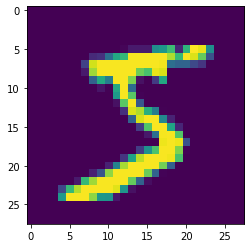

Train data shape (60000, 28, 28)
Test data shape (10000, 28, 28)
Train label shape (60000,)
Test label shape (10000,)
Data sample
Label -  5


In [7]:
import matplotlib.pyplot as plt
plt.imshow(trainData[0])
plt.show()
print("Train data shape", trainData.shape)
print("Test data shape", testData.shape)
print("Train label shape", trainLabels.shape)
print("Test label shape", testLabels.shape)
print("Data sample")
print("Label - ", trainLabels[0])
# print("Image - ", trainData[0])

### **A**1.4 Reshape the design matrix


In [9]:
# Reshape the train and test data to include the depth
# Current shape - num_samples x rows x columns
# Desired shape - num_samples x rows x columns x depth

In [10]:
trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
testData = testData.reshape((testData.shape[0], 28, 28, 1))
print(trainData.shape)
print(testData.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### **A**1.5 Scale the data


In [11]:
# Scale image pixel intensities to the range [0, 1] (currently [0, 255])

In [8]:
trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0

### **A**1.6 Binarize the labels


In [13]:
# convert the labels from integers to vectors

In [11]:
import numpy
import sys
numpy.set_printoptions(threshold=sys.maxsize)

from sklearn.preprocessing import LabelBinarizer
le = LabelBinarizer()
trainLabels = le.fit_transform(trainLabels)
testLabels = le.transform(testLabels)
print(trainLabels.shape)
print(testLabels)

(60000, 10)
[[0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0]

### **Assessment**

* Why is the dataset split into train and test data?
* What is meant by binarization of the data performed?
* What are the advantages of binarizing the data?

## **Activity** 2: Build the model

### **Concepts for this activity** 

* Deep Learning Pipeline [**11-neural-networks-2**](https://elearning.uni-bremen.de/sendfile.php?force_download=0&type=0&file_id=9f093013335b04940ed162c742b2fc56&file_name=10-neural-networks-2.pdf#page=5))
* What is Deep Learning [**11-neural-networks-2**](https://elearning.uni-bremen.de/sendfile.php?force_download=0&type=0&file_id=9f093013335b04940ed162c742b2fc56&file_name=10-neural-networks-2.pdf#page=6))
* Image convolution [**11-neural-networks-2**](https://elearning.uni-bremen.de/sendfile.php?force_download=0&type=0&file_id=9f093013335b04940ed162c742b2fc56&file_name=10-neural-networks-2.pdf#page=21))
* CNNs [**11-neural-networks-2**](https://elearning.uni-bremen.de/sendfile.php?force_download=0&type=0&file_id=9f093013335b04940ed162c742b2fc56&file_name=10-neural-networks-2.pdf#page=27))
* Fully connected layers [**11-neural-networks-2**](https://elearning.uni-bremen.de/sendfile.php?force_download=0&type=0&file_id=9f093013335b04940ed162c742b2fc56&file_name=10-neural-networks-2.pdf#page=32))
* Pooling [**11-neural-networks-2**](https://elearning.uni-bremen.de/sendfile.php?force_download=0&type=0&file_id=9f093013335b04940ed162c742b2fc56&file_name=10-neural-networks-2.pdf#page=38))
* Activation Functions ([**11-neural-networks-2**](https://elearning.uni-bremen.de/sendfile.php?force_download=0&type=0&file_id=0d7d97818393935c9e67df2d8cf8284b&file_name=10-neural-networks-1.pdf#page=43))   

*Fundamentals*  
🔴 [LeNet Architecture](https://pyimagesearch.com/2016/08/01/lenet-convolutional-neural-network-in-python/)  
🔴 [SGD Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/SGD)

### **A**2.1 Define empty LeNet model class


In [151]:
# Define an empty class LeNet with a static method 'build' that 
# takes width, height, depth (no, of channels of image), classes as arguments and returns model

In [12]:
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        return 1

### **A**2.3 Initialize the model


In [153]:
# initialize the model as Sequential(), define the input shape

In [25]:
from tensorflow.keras.models import Sequential
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        
        model = Sequential()
        inputShape = (height, width, depth)

### **A**2.4 Add first convolution layer


In [184]:
# first set of CONV => RELU => POOL layers

In [185]:
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        
        model = Sequential()
        inputShape = (height, width, depth)
        
        model.add(Conv2D(20, (5, 5), padding="same",
        input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

### **A**2.5 Add second convolution layer


In [157]:
# second set of CONV => RELU => POOL layers

In [26]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        
        model = Sequential()
        inputShape = (height, width, depth)
        
        model.add(Conv2D(20, (5, 5), padding="same",
        input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

### **A**2.6 Add fully connected layer


In [159]:
# first (and only) set of FC => RELU layers

In [23]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        
        model = Sequential()
        inputShape = (height, width, depth)
        
        model.add(Conv2D(20, (5, 5), padding="same",
        input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

### **A**2.7 Add softmax classifier


In [161]:
# softmax classifier

In [188]:
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        
        model = Sequential()
        inputShape = (height, width, depth)
        
        model.add(Conv2D(20, (5, 5), padding="same",
        input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        
        model.add(Dense(classes))
        model.add(Activation("softmax"))

### **A**2.8 Return the constructed network architecture


In [163]:
# return the constructed network architecture

In [27]:
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        
        model = Sequential()
        inputShape = (height, width, depth)
        
        model.add(Conv2D(20, (5, 5), padding="same",
        input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        
        return model

### **A**2.9 Initialize the optimizer for the model


In [28]:
# Initialize the optimizer

In [29]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01)

### **A**2.10 Build LeNet model


In [30]:
# Build LeNet model

In [31]:
opt = SGD(learning_rate=0.01)
model = LeNet.build(width=28, height=28, depth=1, classes=10)

### **A**2.11 Compile model


In [194]:
# Compile the model

In [32]:
from tensorflow.keras import backend as K
model = LeNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

### **Assessment**

* What is deep learning?
* How is deep learning different from typical machine learning?
* What is meant by a convolution?
* What are the steps involved in a deep learning pipeline?
* What is the LeNet architecture?
* What is the no. of the layers of the model used?
* Which activation function is used for fully connected layer in this problem?

## **Activity** 3: Training and evaluating the model

### **Concepts for this activity** 

*Fundamentals*  
🔴 [Classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)  
🔴 [Keras model](https://www.tensorflow.org/api_docs/python/tf/keras/Model)  
🔴 [Evaluation metrics](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)

### **A**3.1 Train the model


In [196]:
# Train the model using model.fit

In [197]:
H = model.fit(trainData, trainLabels,
	validation_data=(testData, testLabels), batch_size=128,
	epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 15s 31ms/step - loss: 0.9203 - accuracy: 0.7617 - val_loss: 0.3222 - val_accuracy: 0.9055
Epoch 2/20
469/469 [==============================] - 14s 30ms/step - loss: 0.2663 - accuracy: 0.9205 - val_loss: 0.1996 - val_accuracy: 0.9419
Epoch 3/20
469/469 [==============================] - 14s 30ms/step - loss: 0.1910 - accuracy: 0.9431 - val_loss: 0.1580 - val_accuracy: 0.9532
Epoch 4/20
469/469 [==============================] - 13s 28ms/step - loss: 0.1503 - accuracy: 0.9553 - val_loss: 0.1326 - val_accuracy: 0.9588
Epoch 5/20
469/469 [==============================] - 14s 29ms/step - loss: 0.1237 - accuracy: 0.9636 - val_loss: 0.1000 - val_accuracy: 0.9703
Epoch 6/20
469/469 [==============================] - 14s 29ms/step - loss: 0.1057 - accuracy: 0.9691 - val_loss: 0.1007 - val_accuracy: 0.9688
Epoch 7/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0938 - accuracy: 0.9726 - val_loss: 0.0807 - val_accuracy:

### **A**3.2 Evaluate the network


In [198]:
# Evalute the network 

In [199]:
predictions = model.predict(testData, batch_size=128)

79/79 [==============================] - 1s 10ms/step


### **A**3.3 Display prediction results


In [200]:
# Display prediction results

In [202]:
from sklearn.metrics import classification_report
print(classification_report(testLabels.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in le.classes_]))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### **A**3.4 Plot the training loss and accuracy


In [203]:
# Plot the training loss and accuracy
# plot the training loss and accuracy

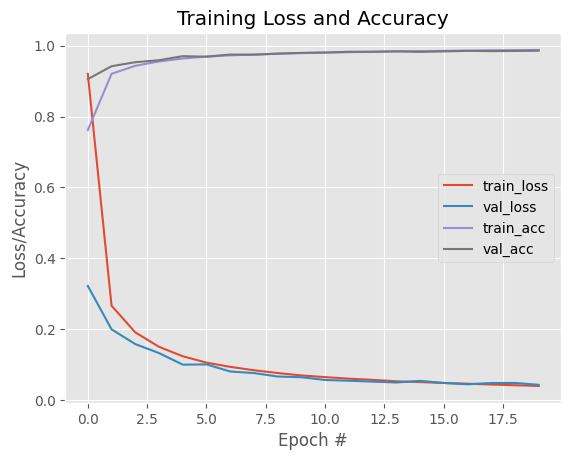

In [209]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

### **Assessment**

* Which tensorflow function is used to train the model?
* What is meant by evaluation metrics?
* Which metrics are used for evaluation?
* What is the difference between model.fit and model.predict?

# References

* https://pyimagesearch.com/2016/08/01/lenet-convolutional-neural-network-in-python/
* https://pyimagesearch.com/2021/05/22/lenet-recognizing-handwritten-digits/?_ga=2.9541565.983051749.1673515698-2010803764.1670420391
* http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf